In [52]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
#Load the dataset
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


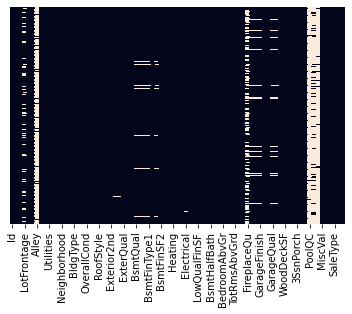

In [ ]:
#Finding null values with the help of heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
#FInding the count of missing values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
#Finding feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

HANDLING MISSING VALUES:

In [ ]:
#Fill Missing values by taking the mean
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [ ]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

In [ ]:
#Drop thefeature which has more than 50% null values
df.drop(['Alley'],axis=1,inplace=True)
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [ ]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [ ]:
df.drop(['Id','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
df.shape

(1460, 75)

In [ ]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [ ]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

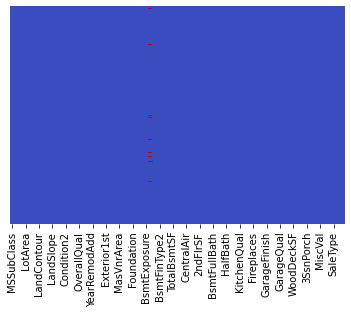

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1422, 75)

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
#Handling categorical Features by creating an arraw function to capture the features  and a get dummy usings pandas
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond','ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
len(columns)

39

In [ ]:
#Function which will handle all the features and convert into categories 
def category_onehot_multcols(multcolumns):
    df_final=finalised_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(finalised_df[fields],drop_first=True)
        
        finalised_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([finalised_df,df_final],axis=1)
        
    return df_final

In [ ]:
#Make a copy of the data frame into one variable
main_df=df.copy()

In [ ]:
#Concatenating test data with train data , as the features variable count in test differs from train data.
#lOAD THE FORMULATED TEST FILE
from google.colab import files
uploaded=files.upload()

Saving formulatedtest.csv to formulatedtest.csv


In [ ]:
test_df=pd.read_csv('formulatedtest.csv')

In [ ]:
test_df.shape

(1459, 74)

In [ ]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [ ]:
finalised_df=pd.concat([df,test_df],axis=0)

In [ ]:
finalised_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [ ]:
finalised_df.shape


(2881, 75)

In [ ]:
finalised_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [ ]:
finalised_df.shape

(2881, 235)

In [ ]:
#Removing all the duplicated columns.
finalised_df=finalised_df.loc[:,~finalised_df.columns.duplicated()]

In [ ]:
finalised_df.shape

(2881, 175)

In [ ]:
finalised_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [57]:
#Drop features that are correlated to each other

covarianceMatrix = finalised_df.corr()
listOfFeatures = [i for i in covarianceMatrix]
setOfDroppedFeatures = set() 
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)): #Avoid repetitions 
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(covarianceMatrix[feature1][feature2]) > 0.8: #If the correlation between the features is > 0.8
            setOfDroppedFeatures.add(feature1) #Add one of them to the set
finalised_df = finalised_df.drop(setOfDroppedFeatures, axis=1)

In [58]:
#Drop features that are not correlated with output

nonCorrelatedWithOutput = [column for column in finalised_df if abs(finalised_df[column].corr(finalised_df["SalePrice"])) < 0.045]
finalised_df = finalised_df.drop(nonCorrelatedWithOutput, axis=1)

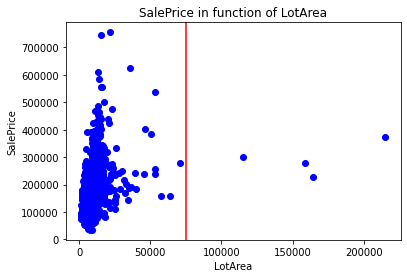

In [60]:
#Plot one of the features with outliers

plt.plot(finalised_df['LotArea'], finalised_df['SalePrice'], 'bo')
plt.axvline(x=75000, color='r')
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
plt.title('SalePrice in function of LotArea')
plt.show()

In [62]:
newTrain=finalised_df.iloc[:1422,:]
newTest=finalised_df.iloc[1422:,:]

In [65]:
#define a function that returns outlier values using percentile() method

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) 
    upper_bound = quartile_3 + (iqr * 1.5) 
    return np.where((ys > upper_bound) | (ys < lower_bound)) 



In [67]:
trainWithoutOutliers = newTrain

In [68]:
#Train the data
X = trainWithoutOutliers.drop("SalePrice", axis=1) #Remove SalePrice column
Y = np.log1p(trainWithoutOutliers["SalePrice"]) #Get SalePrice column {log1p(x) = log(x+1)}
reg = LinearRegression().fit(X, Y)

In [74]:
newTest.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SBrkr,Maj2,Min1,Min2,Typ,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,270.0,...,1,0,0,0,1,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,406.0,...,1,0,0,0,1,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,137.0,...,1,0,0,0,1,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,324.0,...,1,0,0,0,1,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,1017.0,...,1,0,0,0,1,0,0,0,1,0


In [75]:
finalised_df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SBrkr,Maj2,Min1,Min2,Typ,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,...,1,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,...,1,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,...,1,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,...,1,0,0,0,1,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,...,1,0,0,0,1,0,0,0,1,0


In [77]:
sub = pd.DataFrame() #Create a new DataFrame for submission
sub['LotArea'] = newTest['LotArea']
sub['SalePrice'] = pred
sub.to_csv("submission.csv", index=False) #Convert DataFrame to .csv file

In [78]:
sub

,LotArea,SalePrice
0,11622,134241.715513
1,14267,154011.832983
2,13830,173313.040000
3,9978,199307.912324
4,5005,210521.319958
...,...,...
1454,1936,81717.565182
1455,1894,81409.282736
1456,20000,157234.243932
1457,10441,123396.565390
